In [1]:
import librosa 
import pandas as pd 
import numpy as np
import random 
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import Audio

2025-03-28 15:14:19.085142: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 15:14:19.335934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743174859.424555     761 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743174859.446464     761 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-28 15:14:19.644916: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
audiofiles = pd.read_csv('data/UrbanSound8K.csv')
audiofiles.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
audiofiles['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [4]:
list(np.where(audiofiles['class']=='gun_shot')[0])[0]

np.int64(106)

In [5]:
idx = list(np.where(audiofiles['class'] == 'gun_shot')[0])[0]
arr = np.array(audiofiles['slice_file_name'])
fold = np.array(audiofiles['fold'])
cla = np.array(audiofiles['class'])

# Construct the file path
file_path = os.path.join("data", "fold" + str(fold[idx]), str(arr[idx]))
full_path = os.path.join("/home/sanjai/mlprojects/Unisys", file_path)

# Check if the file exists and load it
if os.path.exists(full_path):
    original_audio, sample_rate = librosa.load(full_path)
    display(Audio(data=original_audio, rate=sample_rate))
else:
    print(f"File not found at: {full_path}")

Text(0.5, 23.52222222222222, 'Time [secs]')

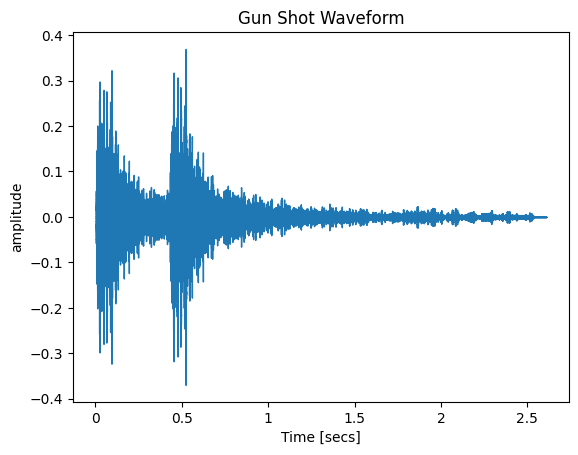

In [6]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(original_audio,sr=sample_rate,ax=ax)
ax.set(title='Gun Shot Waveform')
ax.set_ylabel('amplitude')
ax.set_xlabel('Time [secs]')

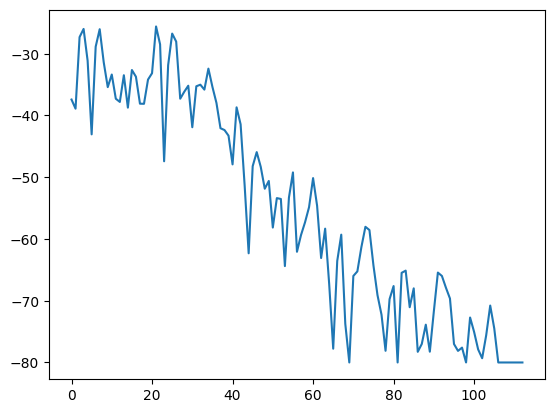

In [7]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(original_audio)),ref = np.max)
D.shape

plt.plot(D[100])

Text(0.5, 1.0, 'gun_shot')

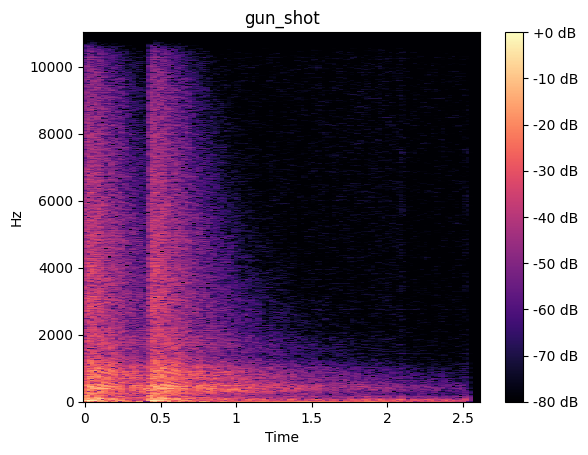

In [8]:
librosa.display.specshow(D,y_axis='linear',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(cla[idx])

Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold9/159748-8-0-9.wav
Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold6/194753-3-2-0.wav
Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold3/159761-0-0-6.wav
Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold10/118278-4-0-11.wav
Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold2/72567-1-1-0.wav


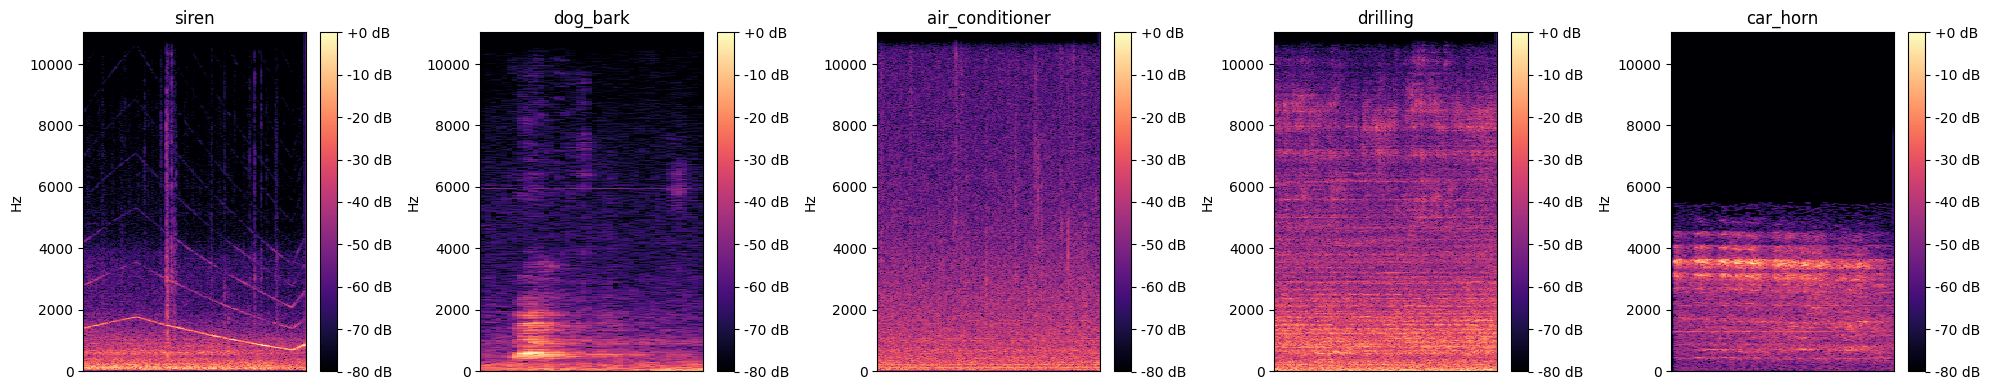

In [9]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Randomly select 5 samples
rng = np.random.default_rng()
sample = rng.integers(0, audiofiles.shape[0], size=5)

# Create a single figure with 5 subplots
plt.figure(figsize=(20, 4))

for idx, i in enumerate(sample, 1):
    # Construct the correct local file path
    path = os.path.join("/home/sanjai/mlprojects/Unisys/data", "fold" + str(fold[i]), str(arr[i]))
    print(f"Attempting to load: {path}")  # Debug print
    # Check if file exists before loading
    if os.path.exists(path):
        data, sampling_rate = librosa.load(path)
        # Compute STFT and convert to dB
        D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
        # Add subplot
        plt.subplot(1, 5, idx)
        librosa.display.specshow(D, y_axis='linear', sr=sampling_rate)
        plt.colorbar(format='%+2.0f dB')
        plt.title(cla[i])
    else:
        print(f"File not found: {path}")
        plt.subplot(1, 5, idx)
        plt.text(0.5, 0.5, "File Not Found", ha='center', va='center')
        plt.title(cla[i])

# Adjust layout and display
plt.tight_layout()
plt.show()

Loading file: /home/sanjai/mlprojects/Unisys/data/fold1/102305-6-0-0.wav
Mel-spectrogram shape: (128, 113)
Class: gun_shot


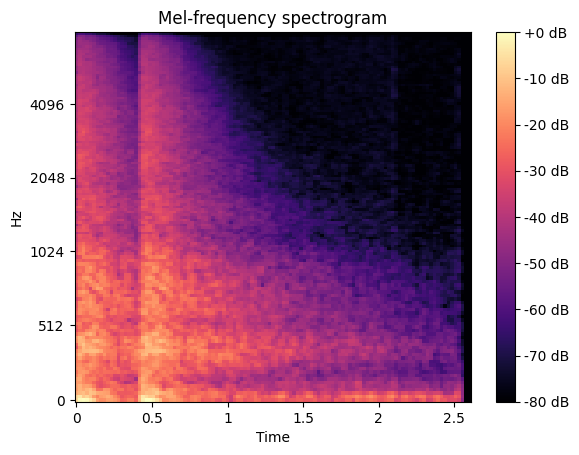

In [10]:
idx = list(np.where(audiofiles['class'] == 'gun_shot')[0])[0]
arr = np.array(audiofiles['slice_file_name'])
fold = np.array(audiofiles['fold'])
cla = np.array(audiofiles['class'])

# Construct the correct local path
path = os.path.join("/home/sanjai/mlprojects/Unisys/data", "fold" + str(fold[idx]), str(arr[idx]))
print(f"Loading file: {path}")  # Debug print

# Load audio if the file exists
if os.path.exists(path):
    data, sampling_rate = librosa.load(path)
    # Compute Mel-spectrogram
    melspec = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    print("Mel-spectrogram shape:", melspec.shape)
    print("Class:", cla[idx])
    # Play audio
    display(Audio(data=data, rate=sampling_rate))
    
    # Plot Mel-spectrogram
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(melspec, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', 
                                   sr=sampling_rate, fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    plt.show()
else:
    print(f"File not found: {path}")

In [11]:
feature = []
label = []

for i in range(len(audiofiles)):
    filename = os.path.join("/home/sanjai/mlprojects/Unisys/data", "fold" + str(audiofiles['fold'][i]), str(audiofiles['slice_file_name'][i]))
    X, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    feature.append(mels)
    label.append(audiofiles['classID'][i])

/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [12]:
classids = audiofiles['classID'].unique()
classes = audiofiles['class'].unique()

In [13]:
classids

array([3, 2, 1, 0, 9, 6, 8, 5, 7, 4])

In [14]:
classes

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [15]:
temp = np.array([feature,label],dtype='object')
data = temp.transpose()

In [16]:
X_ = data[:,0]
Y = data[:,1]

print(X_.shape,Y.shape)

(8732,) (8732,)


In [17]:
X = np.empty([8732,128])

for i in range(8732):
    X[i] = (X_[i])

In [18]:
Y = to_categorical(Y)

In [19]:
print(X.shape)
(Y.shape)

(8732, 128)


(8732, 10)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=123,test_size = 0.2)
print('Number of Train Samples',X_train.shape[0])
print('Number of test samples',X_test.shape[0])

Number of Train Samples 6985
Number of test samples 1747


In [21]:
model = Sequential(
        [
            Dense(1000,activation='relu',input_shape=(128,)),
            Dense(750,activation='relu'),
            Dense(500,activation='relu'),
            Dense(250,activation='relu'),
            Dense(100,activation='relu'),
            Dense(50,activation='relu'),
            Dense(10,activation='softmax'),
            
        ]
)

model.summary()

/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1743175329.265643     761 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │       129,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411,160 (5.38 MB)

 Trainable params: 1,411,160 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=90,batch_size=50,validation_data=[X_test,Y_test])

Epoch 1/90


I0000 00:00:1743175333.266079    1415 service.cc:148] XLA service 0x7f27a8010aa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743175333.266353    1415 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-03-28 15:22:13.301628: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743175333.455661    1415 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-28 15:22:14.134186: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 112 bytes spill stores, 112 bytes spill loads

2025-03-28 15:22:14.137741: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 44 bytes

 91/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2265 - loss: 2.5384   

I0000 00:00:1743175342.106350    1415 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


120/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2431 - loss: 2.4596

2025-03-28 15:22:22.967197: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 44 bytes spill stores, 44 bytes spill loads

2025-03-28 15:22:22.973683: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 112 bytes spill stores, 112 bytes spill loads

2025-03-28 15:22:23.103815: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 556 bytes spill stores, 432 bytes spill loads

2025-03-28 15:22:23.472150: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 300 bytes spill stores, 364 bytes spill loads

2025-03-28 15:22:23.547012: I external/local_xla/xla/strea

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.2523 - loss: 2.4178

2025-03-28 15:22:35.191610: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_55', 44 bytes spill stores, 44 bytes spill loads

2025-03-28 15:22:35.207525: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_55', 112 bytes spill stores, 112 bytes spill loads

2025-03-28 15:22:35.373053: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_55', 556 bytes spill stores, 432 bytes spill loads

2025-03-28 15:22:35.417280: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_62', 104 bytes spill stores, 128 bytes spill loads

2025-03-28 15:22:35.528150: I external/local_xla/xla/stream_ex

140/140 ━━━━━━━━━━━━━━━━━━━━ 27s 125ms/step - accuracy: 0.2527 - loss: 2.4159 - val_accuracy: 0.3869 - val_loss: 1.9057
Epoch 2/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4079 - loss: 1.8049 - val_accuracy: 0.4327 - val_loss: 1.7519
Epoch 3/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4697 - loss: 1.5852 - val_accuracy: 0.5197 - val_loss: 1.5102
Epoch 4/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5535 - loss: 1.3881 - val_accuracy: 0.5718 - val_loss: 1.4068
Epoch 5/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6218 - loss: 1.1634 - val_accuracy: 0.6216 - val_loss: 1.2776
Epoch 6/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6966 - loss: 0.9424 - val_accuracy: 0.6508 - val_loss: 1.1261
Epoch 7/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7332 - loss: 0.8168 - val_accuracy: 0.7006 - val_loss: 1.0020
Epoch 8/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7700 - loss: 0.7269 - val_accuracy: 0.6949 - v

In [23]:
classes = audiofiles.groupby('classID')['class'].unique()
classes

classID
0     [air_conditioner]
1            [car_horn]
2    [children_playing]
3            [dog_bark]
4            [drilling]
5       [engine_idling]
6            [gun_shot]
7          [jackhammer]
8               [siren]
9        [street_music]
Name: class, dtype: object

In [24]:
def prediction_parser(filename,model):
    feature = []
    label = []
    # Here kaiser_fast is a technique used for faster extraction
    audiodata, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    # We extract mfcc feature from data
    mels = np.mean(librosa.feature.melspectrogram(y=audiodata, sr=sample_rate).T,axis=0)        
    feature.append(mels)
    label.append(audiofiles["class"][audiofiles['slice_file_name']==filename.split('/',5)[5]].values[0])
    temp_preds = np.array([feature,label],dtype=object)
    data_preds = temp_preds.transpose()
    X_ = data_preds[:, 0]
    X = np.empty([1, 128])
    X[0] = (X_[0])
    Audio(data = original_audio, rate = sample_rate)
    classid = np.argmax(model.predict(X))
    print('Class predicted :',classes[classid][0],'\n\n','actual',label)
    return (Audio(data = audiodata, rate = sample_rate))

In [25]:
import os
import numpy as np
import librosa

def prediction_parser(filename, model):
    # Load audio and extract Mel-spectrogram feature
    audiodata, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mels = np.mean(librosa.feature.melspectrogram(y=audiodata, sr=sample_rate).T, axis=0)
    
    # Prepare feature for prediction (shape: (1, 128))
    feature = np.array([mels], dtype=np.float32)  # Add batch dimension
    
    # Predict using the model
    prediction = model.predict(feature)
    return prediction

# Usage
file_path = os.path.join("/home/sanjai/mlprojects/Unisys/data", "fold1", "102305-6-0-0.wav")
prediction = prediction_parser(file_path, model)
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Prediction: [[1.1669839e-05 3.0986383e-04 3.5991673e-03 1.7944525e-03 2.4320910e-04
  2.4580484e-04 9.9341899e-01 1.5912484e-04 2.0056592e-04 1.7105591e-05]]


In [26]:
audiodata, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
mels = np.mean(librosa.feature.melspectrogram(y=audiodata, sr=sample_rate).T, axis=0)
feature = np.array([mels], dtype=np.float32)
print("Feature shape:", feature.shape)  # Should be (1, 128)
print("Feature dtype:", feature.dtype)  # Should be float32
prediction = model.predict(feature)
print("Prediction:", prediction)

Feature shape: (1, 128)
Feature dtype: float32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction: [[1.1669839e-05 3.0986383e-04 3.5991673e-03 1.7944525e-03 2.4320910e-04
  2.4580484e-04 9.9341899e-01 1.5912484e-04 2.0056592e-04 1.7105591e-05]]


In [27]:
def prediction_parser(filename, model):
    audiodata, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mels = np.mean(librosa.feature.melspectrogram(y=audiodata, sr=sample_rate).T, axis=0)
    feature = np.array([mels], dtype=np.float32)
    base_filename = os.path.basename(filename)
    true_label = audiofiles["class"][audiofiles['slice_file_name'] == base_filename].values[0]
    prediction = model.predict(feature)
    return prediction, true_label

file_path = os.path.join("/home/sanjai/mlprojects/Unisys/data", "fold1", "102305-6-0-0.wav")
pred, true = prediction_parser(file_path, model)
print("Prediction:", pred)
print("True label:", true)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: [[1.1669839e-05 3.0986383e-04 3.5991673e-03 1.7944525e-03 2.4320910e-04
  2.4580484e-04 9.9341899e-01 1.5912484e-04 2.0056592e-04 1.7105591e-05]]
True label: gun_shot


In [28]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold1/102305-6-0-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


(array([[1.1669839e-05, 3.0986383e-04, 3.5991673e-03, 1.7944525e-03,
         2.4320910e-04, 2.4580484e-04, 9.9341899e-01, 1.5912484e-04,
         2.0056592e-04, 1.7105591e-05]], dtype=float32),
 'gun_shot')

In [29]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold5/17578-5-0-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


(array([[1.5235563e-15, 9.8201318e-24, 2.4511933e-39, 8.2127574e-25,
         1.4012985e-45, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         5.6735492e-34, 9.8697671e-19]], dtype=float32),
 'engine_idling')

In [30]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold1/102305-6-0-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


(array([[1.1669839e-05, 3.0986383e-04, 3.5991673e-03, 1.7944525e-03,
         2.4320910e-04, 2.4580484e-04, 9.9341899e-01, 1.5912484e-04,
         2.0056592e-04, 1.7105591e-05]], dtype=float32),
 'gun_shot')

In [31]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold2/33849-3-4-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


(array([[1.35247269e-13, 5.56853497e-09, 6.83558483e-06, 9.99622583e-01,
         2.34646973e-06, 6.17009807e-13, 1.01740159e-06, 3.36222003e-14,
         2.65203329e-04, 1.01876394e-04]], dtype=float32),
 'dog_bark')

In [32]:
model.save("/home/sanjai/mlprojects/Unisys/saved_model/my_model.keras")

In [33]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold3/17853-5-0-1.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


(array([[0.07406913, 0.09366252, 0.0508523 , 0.13972372, 0.04887227,
         0.23272735, 0.02153145, 0.17409779, 0.04043755, 0.12402595]],
       dtype=float32),
 'engine_idling')

In [34]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold1/102305-6-0-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(array([[1.1669839e-05, 3.0986383e-04, 3.5991673e-03, 1.7944525e-03,
         2.4320910e-04, 2.4580484e-04, 9.9341899e-01, 1.5912484e-04,
         2.0056592e-04, 1.7105591e-05]], dtype=float32),
 'gun_shot')

In [35]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold8/7390-9-0-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(array([[1.1686410e-07, 1.3735638e-08, 9.9105195e-09, 1.3162228e-04,
         5.5538081e-09, 1.3703511e-05, 7.1333356e-10, 6.5476811e-09,
         4.2801215e-10, 9.9985445e-01]], dtype=float32),
 'street_music')

In [36]:
def check_audio_type(file_path):
    
    file_name = os.path.basename(file_path)
    
    # Find the corresponding class from the dataset
    matching_row = audiofiles[audiofiles['slice_file_name'] == file_name]
    
    if not matching_row.empty:
        audio_class = matching_row['class'].values[0]
        print(f"Audio Class: {audio_class}")
        
        # Load and play the audio file
        if os.path.exists(file_path):
            original_audio, sample_rate = librosa.load(file_path)
            display(Audio(data=original_audio, rate=sample_rate))
        else:
            print("File not found.")
    else:
        print("Audio file not found in the dataset.")

# Provide the file path as input
file_path = "/home/sanjai/mlprojects/Unisys/data/fold8/7390-9-0-0.wav"
check_audio_type(file_path)


Audio Class: street_music


In [48]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold1/102305-6-0-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


(array([[1.1669839e-05, 3.0986383e-04, 3.5991673e-03, 1.7944525e-03,
         2.4320910e-04, 2.4580484e-04, 9.9341899e-01, 1.5912484e-04,
         2.0056592e-04, 1.7105591e-05]], dtype=float32),
 'gun_shot')